In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df = pd.read_csv(r"C:/Users/Asus/Desktop/car_data.csv")

In [3]:
#First few rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Understanding

In [4]:
print(f"Number of rows in the dataset:", df.shape[0])
print(f"Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 301
Number of columns in the dataset: 9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(df.isnull().sum())
print("-------------------------------")
if df.isnull().sum().values.sum() == 0:
    print("The data has no missing values!")

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
-------------------------------
The data has no missing values!


In [7]:
df["Car_Name"].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [8]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [9]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [10]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [11]:
df["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [12]:
df["Year"].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

## Adding new features

In [13]:
Current_Year = 2024

In [14]:
df["Car_Age"] = df["Year"].apply(lambda x: Current_Year-x)

### Encoding Categorical Data

In [15]:
le = LabelEncoder()

In [16]:
df["Fuel_Type_Encoded"] = le.fit_transform(df["Fuel_Type"])
df["Seller_Type_Encoded"] = le.fit_transform(df["Seller_Type"])
df["Transmission_Encoded"] = le.fit_transform(df["Transmission"])

In [17]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Age',
       'Fuel_Type_Encoded', 'Seller_Type_Encoded', 'Transmission_Encoded'],
      dtype='object')

In [18]:
df = df[['Car_Name', 'Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Car_Age', 'Kms_Driven', 'Fuel_Type_Encoded', 'Seller_Type_Encoded', 'Transmission_Encoded', 'Owner', 'Present_Price', 'Selling_Price']]

In [19]:
df.head()

,Car_Name,Year,Fuel_Type,Seller_Type,Transmission,Car_Age,Kms_Driven,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Owner,Present_Price,Selling_Price
0,ritz,2014,Petrol,Dealer,Manual,10,27000,2,0,1,0,5.59,3.35
1,sx4,2013,Diesel,Dealer,Manual,11,43000,1,0,1,0,9.54,4.75
2,ciaz,2017,Petrol,Dealer,Manual,7,6900,2,0,1,0,9.85,7.25
3,wagon r,2011,Petrol,Dealer,Manual,13,5200,2,0,1,0,4.15,2.85
4,swift,2014,Diesel,Dealer,Manual,10,42450,1,0,1,0,6.87,4.60


### Statistical Analysis

In [20]:
df.describe()

,Year,Car_Age,Kms_Driven,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Owner,Present_Price,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,10.372093,36947.205980,1.787375,0.352159,0.867110,0.043189,7.628472,4.661296
std,2.891554,2.891554,38886.883882,0.425801,0.478439,0.340021,0.247915,8.644115,5.082812
min,2003.000000,6.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.320000,0.100000
25%,2012.000000,8.000000,15000.000000,2.000000,0.000000,1.000000,0.000000,1.200000,0.900000
50%,2014.000000,10.000000,32000.000000,2.000000,0.000000,1.000000,0.000000,6.400000,3.600000
75%,2016.000000,12.000000,48767.000000,2.000000,1.000000,1.000000,0.000000,9.900000,6.000000
max,2018.000000,21.000000,500000.000000,2.000000,1.000000,1.000000,3.000000,92.600000,35.000000


### Visualisations

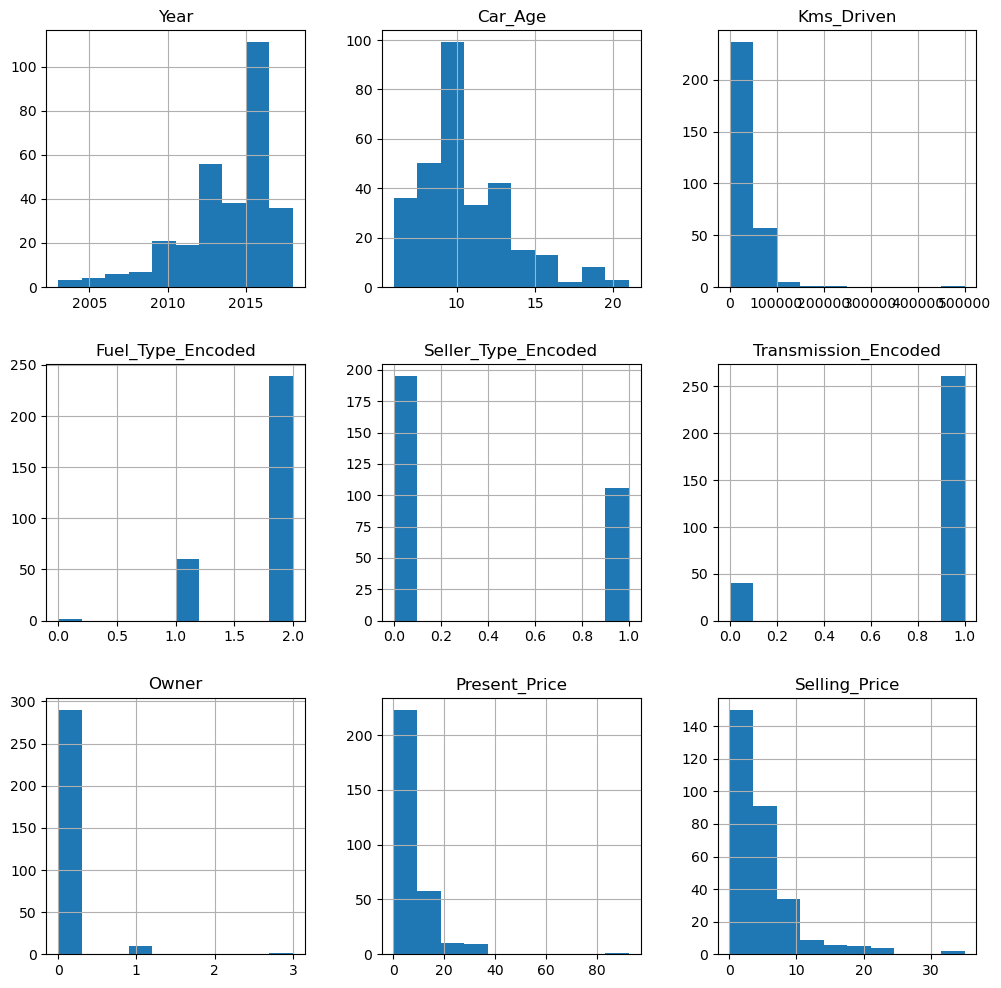

In [21]:
#Histogram
df.hist(figsize=(12,12))
plt.show()

In [22]:
df1 = df.iloc[:,5:]

In [23]:
# #Pairplot
# sns.pairplot(data=df1)
# plt.show()

### Visualising the correlation-matrix 

In [24]:
# sns.heatmap(df1.corr(), cmap="coolwarm", annot=True)
# plt.xticks(rotation=70)
# plt.show()

### Feature Scaling

In [25]:
#Features
X = df.iloc[:,5:-1]
X

,Car_Age,Kms_Driven,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Owner,Present_Price
0,10,27000,2,0,1,0,5.59
1,11,43000,1,0,1,0,9.54
2,7,6900,2,0,1,0,9.85
3,13,5200,2,0,1,0,4.15
4,10,42450,1,0,1,0,6.87
...,...,...,...,...,...,...,...
296,8,33988,1,0,1,0,11.60
297,9,60000,2,0,1,0,5.90
298,15,87934,2,0,1,0,11.00
299,7,9000,1,0,1,0,12.50


In [26]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled

,Car_Age,Kms_Driven,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Owner,Present_Price
0,-0.128897,-0.256224,0.500183,-0.737285,0.39148,-0.174501,-0.236215
1,0.217514,0.155911,-1.852241,-0.737285,0.39148,-0.174501,0.221505
2,-1.168129,-0.773969,0.500183,-0.737285,0.39148,-0.174501,0.257427
3,0.910335,-0.817758,0.500183,-0.737285,0.39148,-0.174501,-0.403079
4,-0.128897,0.141743,-1.852241,-0.737285,0.39148,-0.174501,-0.087890
...,...,...,...,...,...,...,...
296,-0.821718,-0.076225,-1.852241,-0.737285,0.39148,-0.174501,0.460214
297,-0.475308,0.593804,0.500183,-0.737285,0.39148,-0.174501,-0.200292
298,1.603156,1.313340,0.500183,-0.737285,0.39148,-0.174501,0.390687
299,-1.168129,-0.719876,-1.852241,-0.737285,0.39148,-0.174501,0.564504


In [27]:
#Target
y = df.iloc[:,-1:]
y.columns = df.iloc[:,-1:].columns
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


### Splitting the Data into Train-set and Test-set 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

### Training the Linear Regression model

In [29]:
#Initializing the Linear Regression model
lr = LinearRegression()

In [30]:
#Training the data
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred2 = lr.predict(X_test)

#### Checking the accuracy of the model

In [32]:
print(f"Mean Squared Error:", mean_squared_error(y_pred2, y_test))
print(f"R-squared score:", r2_score(y_pred2, y_test))

Mean Squared Error: 3.7578448245759506
R-squared score: 0.8291882561696109


# Building a DL model

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [34]:
X_train.shape

(201, 7)

In [35]:
#Building the deep learning model
model = Sequential()

In [36]:
# Add layers (input layer + hidden layers)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

In [37]:
# Output layer (single neuron for regression)
model.add(Dense(1))

In [38]:
import keras
# Compile the model with an optimizer, loss function, and metrics
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

In [39]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 40.9124 - mae: 3.8007 - val_loss: 1.7019 - val_mae: 0.9765
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3756 - mae: 1.3883 - val_loss: 6.8953 - val_mae: 1.8476
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4030 - mae: 1.7277 - val_loss: 1.8507 - val_mae: 1.0604
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8731 - mae: 0.9614 - val_loss: 1.9292 - val_mae: 1.0349
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9433 - mae: 1.1629 - val_loss: 1.6426 - val_mae: 0.9323
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2290 - mae: 1.0613 - val_loss: 1.3769 - val_mae: 0.8013
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2695 - mae: 0.6879 - val_loss: 0.5771 - val_mae: 0.5355
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4386 - mae: 0.8055 - val_loss: 1.2840 - val_mae: 0.8548
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5

Epoch 55/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5508 - mae: 0.4619 - val_loss: 2.5271 - val_mae: 0.8889
Epoch 56/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0310 - mae: 0.6149 - val_loss: 0.5830 - val_mae: 0.5459
Epoch 57/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3910 - mae: 0.4701 - val_loss: 0.8597 - val_mae: 0.7276
Epoch 58/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4428 - mae: 0.4694 - val_loss: 1.2283 - val_mae: 0.6745
Epoch 59/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6068 - mae: 0.5051 - val_loss: 0.9458 - val_mae: 0.6208
Epoch 60/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2677 - mae: 0.3452 - val_loss: 0.8726 - val_mae: 0.6020
Epoch 61/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5858 - mae: 0.5345 - val_loss: 1.1050 - val_mae: 0.7441
Epoch 62/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5620 - mae: 0.5192 - val_loss: 0.5821 - val_mae: 0.5852
Epoch 63/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

In [41]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5331 - mae: 0.4969 
Test Mean Absolute Error: 0.5249314308166504


In [42]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R² Score: 0.9796864986419678
